# Atividade Prática -- 10/01/2022

### GB-500-TEMC: Modelos Compartimentais em Epidemiologia e Inferência Bayesiana

#### João Pedro Valeriano Miranda

In [11]:
print("Versões dos Pacotes:")
print("--------------------")
!pip list | grep -E numpy\|scipy\|matplotlib

Versões dos Pacotes:
--------------------
matplotlib           3.5.1
matplotlib-inline    0.1.3
numpy                1.22.0
scipy                1.7.3


## Atividade:

Seja $X$ uma variável aleatória com distribuição **normal**. Assuma que os parâmetros desta distribuição são desconhecidos

Em um determinado evento aleatório, obteve-se as seguintes amostras de $X$:

| $i$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|-----|---|---|---|---|---|---|---|---|---|
| $x_{i}$ | -2.0 | -1.5 | -1.0 | -0.5 | 0.0 | 0.5 | 1.0 | 1.5 | 2.0 |
| $f_{x}(x_{i})$ | 0.0663 | 0.1093 | 0.1613 | 0.213 | 0.2516 | 0.266 | 0.2516 | 0.213 | 0.1613 |

Como podemos descobrir quais os parâmetros (média e desvio padrão) da distribuição normal que melhor **aproximam** estes valores?

Seja $y \sim N\left(\mu, \sigma^{2}\right)$, para $0 \leq \mu \leq 10$ e  $1 \leq \sigma \leq 10$, onde $y_{i} = y(x_{i})$. Obtenha $y^{\ast} \sim N\left(\mu^{\ast}, \sigma^{\ast 2}\right)$ tal que $\left(\mu^{\ast}, \sigma^{\ast 2}\right) = \underset{\mu,\sigma}{\text{argmin}} \sum\limits_{i=0}^{8} \left(y_{i}-f_{x}(x_{i})\right)^{2}$

In [12]:
import numpy as np # arrays etc
import matplotlib.pyplot as plt # gráficos etc
from scipy.stats import norm # distribuição normal
from scipy.optimize import curve_fit # ajuste de curvas

Vamos plotar os dados:

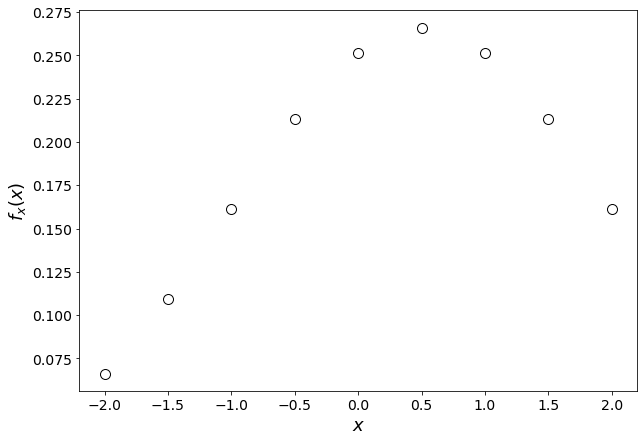

In [27]:
# dados
x = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
f_x = np.array([0.0663, 0.1093, 0.1613, 0.2130, 0.2516, 0.2660, 0.2516, 0.2130, 0.1613])

# gráfico dos dados
plt.figure(figsize=(10,7))
plt.scatter(x, f_x, s=100, edgecolor="k", facecolor="w")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$f_{x}(x)$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Podemos realizar um ajuste via mínimos quadrados da PDF da distribuição normal oara descobrir a média e o desvio padrão que melhor se adequam aos dados. A função [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) é capaz de realizar este ajuste, através de do [Método de Levenberg-Marquadt](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm), como faremos a seguir:

In [63]:
fit = curve_fit(norm.pdf, x, f_x, p0=[5, 5])

print("Resultado do ajuste da média e desvio padrão:")
print("---------------------------------------------")
print(f"\nValores óptimos estimados: {fit[0]}")
print(f"\nMatriz de covariância dos parâmetros estimada:\n{fit[1]}")
print(f"\nErro padrão: {np.sqrt(np.diag(fit[1]))}")

mu, sig = fit[0]

print("\n---------------------------------------------\n")
print(f"Média: mu = {mu:.6f}")
print(f"Desvio padrão: sigma = {sig:.6f}")

Resultado do ajuste da média e desvio padrão:
---------------------------------------------

Valores óptimos estimados: [0.50004913 1.49980803]

Matriz de covariância dos parâmetros estimada:
[[5.82066521e-09 6.73260098e-10]
 [6.73260098e-10 3.70337888e-09]]

Erro padrão: [7.62932842e-05 6.08553931e-05]

---------------------------------------------

Média: mu = 0.500049
Desvio padrão: sigma = 1.499808


Com isto, podemos comparar o ajuste obtido com nossos dados:

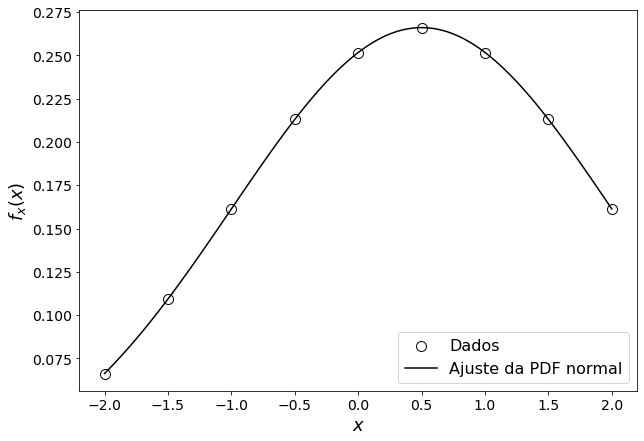

In [49]:
x_ = np.linspace(x[0], x[-1], 100)

# gráfico dos dados com ajuste da PDF com os valores obtidos para média e desvio padrão
plt.figure(figsize=(10,7))
plt.scatter(x, f_x, s=100, edgecolor="k", facecolor="w", label="Dados")
plt.plot(x_, norm.pdf(x_, mu, sig), c="k", label="Ajuste da PDF normal")
plt.legend(loc="lower right", fontsize=16)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$f_{x}(x)$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Vemos que o ajuste se adequa muito bem aos dados.

Vale notar que, baseado no ajuste, podemos estender a PDF com os parâmetros obtidos de modo a conhecer a distribuição em todo o seu domínio. Por exemplo, podemos avaliar a PDF no intervalo $-10 \leq x \leq 10$:

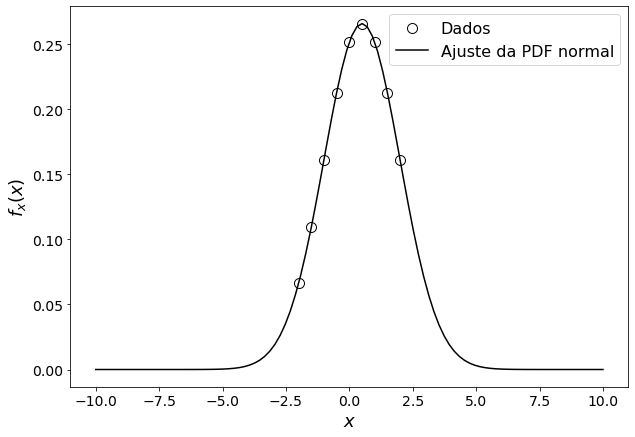

In [57]:
x_ = np.linspace(-10, 10, 100)

# gráfico dos dados com ajuste da PDF com os valores obtidos para média e desvio padrão
plt.figure(figsize=(10,7))
plt.scatter(x, f_x, s=100, edgecolor="k", facecolor="w", label="Dados")
plt.plot(x_, norm.pdf(x_, mu, sig), c="k", label="Ajuste da PDF normal")
plt.legend(loc="upper right", fontsize=16)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$f_{x}(x)$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()